In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import requests
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity as distance
import seaborn as sns
import matplotlib.pyplot as plt

Hay que recopilar todas las frases de todos los personajes

In [30]:
urlUsersNames = "http://localhost:2020/usersnames/"
userNames = requests.get(urlUsersNames).json()
characters = []
print(userNames)
for user in userNames:
    characters.append(user['userName'])

characters = characters[1:]
characters
 

[{'userName': 'pruebaUser', 'userID': 0}, {'userID': 2, 'userName': 'mom', 'userSentiment': 0.2505264705882353}, {'userID': 3, 'userName': 'dad', 'userSentiment': -0.07417333333333334}, {'userID': 4, 'userName': 'sadness', 'userSentiment': 0.031578048780487804}, {'userID': 5, 'userName': 'fear', 'userSentiment': nan}, {'userID': 6, 'userName': 'disgust', 'userSentiment': 0.08455757575757576}, {'userID': 7, 'userName': 'riley', 'userSentiment': 0.16768928571428574}, {'userID': 8, 'userName': 'anger', 'userSentiment': 0.012291891891891882}, {'userID': 9, 'userName': 'mum-sadness', 'userSentiment': -0.07016}, {'userID': 10, 'userName': 'mum-anger', 'userSentiment': nan}, {'userID': 11, 'userName': 'mum-joy', 'userSentiment': nan}, {'userID': 12, 'userName': 'mum-fear', 'userSentiment': 0.0}, {'userID': 13, 'userName': 'dad-anger', 'userSentiment': 0.1504}, {'userID': 14, 'userName': 'dad-fear', 'userSentiment': 0.2775666666666667}, {'userID': 15, 'userName': 'mum-disgust', 'userSentiment'

['mom',
 'dad',
 'sadness',
 'fear',
 'disgust',
 'riley',
 'anger',
 'mum-sadness',
 'mum-anger',
 'mum-joy',
 'mum-fear',
 'dad-anger',
 'dad-fear',
 'mum-disgust',
 'male-forgetter',
 'bing-bong',
 'joy']

In [3]:
big_dict = {}
for c in characters:
    
    charcaterUserDialogues = f"http://localhost:2020/characterdialogues/{c}"
    all_dialogs = pd.DataFrame(requests.get(charcaterUserDialogues).json())
    lista = []
    if 'dialog' in list(all_dialogs.columns):
        print(c)
        for d in all_dialogs['dialog']:
            lista.append(d)
        big_dict[c] = ' '.join(lista)


mom
dad
sadness
disgust
riley
anger
mum-sadness
mum-fear
dad-anger
dad-fear
mum-disgust
joy


In [4]:
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(big_dict.values())
#print(list(count_vectorizer.vocabulary_.keys()))
m = sparse_matrix.todense()
print(m.shape)
print(m[0])

(12, 1079)
[[0 0 1 ... 0 1 0]]


In [5]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=big_dict.keys())
display(df.head())
display(df[["joy","mom"]])

,1ew,1haven,1hm,32,39,62,aboard,about,aboutscaring,absolutely,...,yell,yellow,yet,you,youdoing,young,your,youtell,youwant,zoom
mom,0,0,1,0,0,0,1,1,0,0,...,0,0,1,11,0,0,1,0,1,0
dad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,1,1,0,0,0
sadness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,1,0,0,0
disgust,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
riley,1,0,0,0,0,1,0,2,0,0,...,0,0,0,3,0,0,1,1,0,1


,joy,mom
mom,2,2
dad,0,0
sadness,12,2
disgust,5,1
riley,1,5
anger,2,3
mum-sadness,0,3
mum-fear,0,0
dad-anger,0,1
dad-fear,0,0


In [6]:
similarity_matrix = distance(df,df)
print(similarity_matrix)

[[1.         0.58400265 0.67166018 0.56205836 0.6414351  0.66414413
  0.40275773 0.054846   0.48546204 0.35613896 0.28932089 0.73686178]
 [0.58400265 1.         0.54603005 0.54033552 0.57999756 0.58152255
  0.33441679 0.07800765 0.39346523 0.21465674 0.29640758 0.58559281]
 [0.67166018 0.54603005 1.         0.62056274 0.66794086 0.68407733
  0.38797618 0.12726726 0.50855604 0.33056066 0.27162823 0.78631674]
 [0.56205836 0.54033552 0.62056274 1.         0.54717427 0.62702089
  0.35434268 0.10526899 0.49797731 0.30097718 0.31148406 0.65906372]
 [0.6414351  0.57999756 0.66794086 0.54717427 1.         0.5866466
  0.39528978 0.10092947 0.49425372 0.33869711 0.31822689 0.66387397]
 [0.66414413 0.58152255 0.68407733 0.62702089 0.5866466  1.
  0.41016935 0.         0.50692401 0.28236209 0.37145111 0.68856212]
 [0.40275773 0.33441679 0.38797618 0.35434268 0.39528978 0.41016935
  1.         0.         0.30323807 0.22378448 0.25672693 0.43552493]
 [0.054846   0.07800765 0.12726726 0.10526899 0.10

,mom,dad,sadness,disgust,riley,anger,mum-sadness,mum-fear,dad-anger,dad-fear,mum-disgust,joy
mom,1.000000,0.584003,0.671660,0.562058,0.641435,0.664144,0.402758,0.054846,0.485462,0.356139,0.289321,0.736862
dad,0.584003,1.000000,0.546030,0.540336,0.579998,0.581523,0.334417,0.078008,0.393465,0.214657,0.296408,0.585593
sadness,0.671660,0.546030,1.000000,0.620563,0.667941,0.684077,0.387976,0.127267,0.508556,0.330561,0.271628,0.786317
disgust,0.562058,0.540336,0.620563,1.000000,0.547174,0.627021,0.354343,0.105269,0.497977,0.300977,0.311484,0.659064
riley,0.641435,0.579998,0.667941,0.547174,1.000000,0.586647,0.395290,0.100929,0.494254,0.338697,0.318227,0.663874
anger,0.664144,0.581523,0.684077,0.627021,0.586647,1.000000,0.410169,0.000000,0.506924,0.282362,0.371451,0.688562
mum-sadness,0.402758,0.334417,0.387976,0.354343,0.395290,0.410169,1.000000,0.000000,0.303238,0.223784,0.256727,0.435525
mum-fear,0.054846,0.078008,0.127267,0.105269,0.100929,0.000000,0.000000,1.000000,0.048970,0.067116,0.000000,0.055980
dad-anger,0.485462,0.393465,0.508556,0.497977,0.494254,0.506924,0.303238,0.048970,1.000000,0.394400,0.261294,0.561699
dad-fear,0.356139,0.214657,0.330561,0.300977,0.338697,0.282362,0.223784,0.067116,0.394400,1.000000,0.227891,0.401259


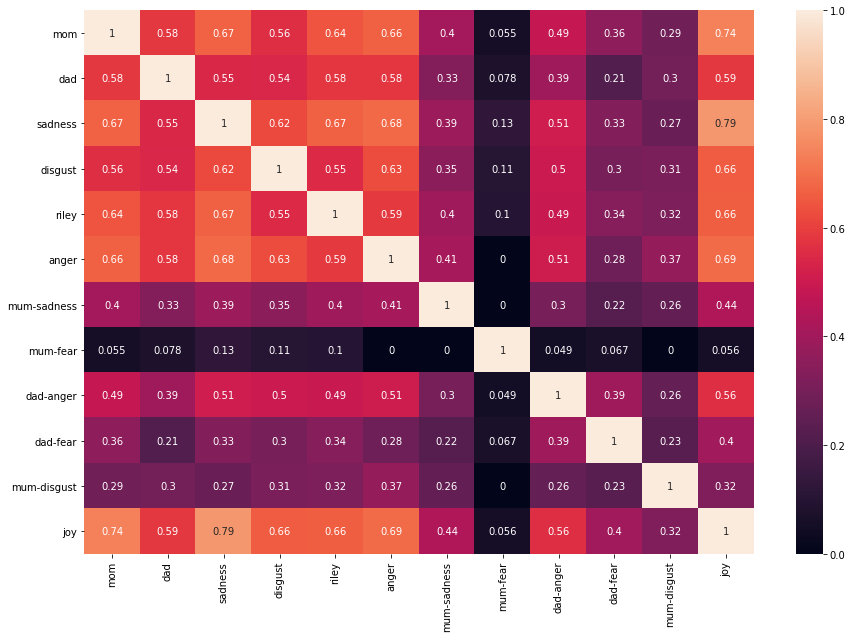

In [7]:
sim_df = pd.DataFrame(similarity_matrix, columns=big_dict.keys(), index=big_dict.keys())
display(sim_df)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(sim_df,annot=True, ax=ax);

### Recomendación:

A continuación se ven de mayor a menos los personajes se recomendarían a 'joy':

In [8]:
ranking = (pd.DataFrame(sim_df['joy'][1:].sort_values(ascending = False))).index
ranking


Index(['joy', 'sadness', 'anger', 'riley', 'disgust', 'dad', 'dad-anger',
       'mum-sadness', 'dad-fear', 'mum-disgust', 'mum-fear'],
      dtype='object')

Hay que verificar con cuál de esos no ha mantenido conversación, y ése será el recomendado:

In [9]:
from pymongo import MongoClient

In [10]:
client = MongoClient("mongodb://localhost:27017/api_db")
db = client.get_database()
coll_users = db['users']
coll_scenes = db['scenes']
coll_dialogues = db['dialogues']

Con quién ha hablado? con esta lista compararemos las recomendaciones, y los que no hayan hablar con joy se recomiendan:

In [11]:
query = {'$and': [{'userNames': {'$eq':'joy'}},{'sceneID':{'$ne': 0}}]}
with_character = list(coll_scenes.find(query,{'_id':0,'userNames':1}))
comunes = []
for e in with_character:
    comunes.append(e['userNames'])
comunes = list(set([e for b in comunes for e in b]))
comunes

['dad',
 'disgust',
 'mom',
 'riley',
 'bing bong',
 'male forgetter',
 'female forgetter',
 'joy',
 'anger',
 'sadness']

In [12]:
for e in ranking:
    if e not in comunes:
        print(f'Recomendamos a {e}')
        break
    

Recomendamos a dad-anger


---------------------
## Prueba con la API:

In [19]:
import requests

In [23]:
urlName = "http://localhost:2020/recommended/joy"
requests.get(urlName).text

'El personaje es : joy'

In [40]:
urlName = "http://localhost:2020/recommended/riley"
requests.get(urlName).text

'Recomendamos a dad-anger para el personaje riley'